In [11]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
with open('data/silver_enriched.csv','r') as f:
    silver_df = pd.read_csv(f)

In [10]:
silver_df.columns
X = silver_df[["year_published","owned_users"]]
y = silver_df["rating_average"]

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=23)


In [13]:
# Create Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Evaluation of Linear Regression Model
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error is {mse}")
print(f"R2 score is {r2}")

Mean Squared Error is 0.8749305281407781
R2 score is 0.03361499167035009


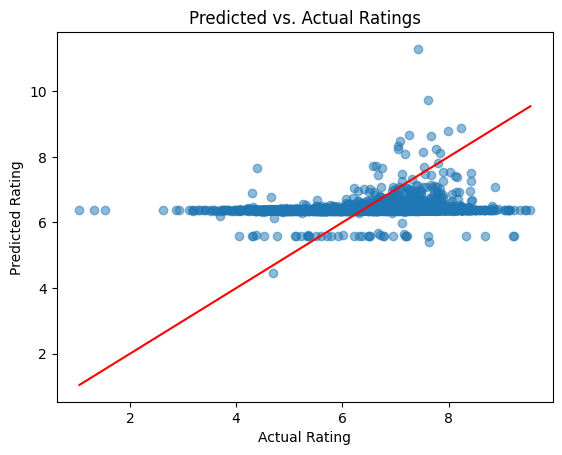

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Predicted vs. Actual Ratings")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

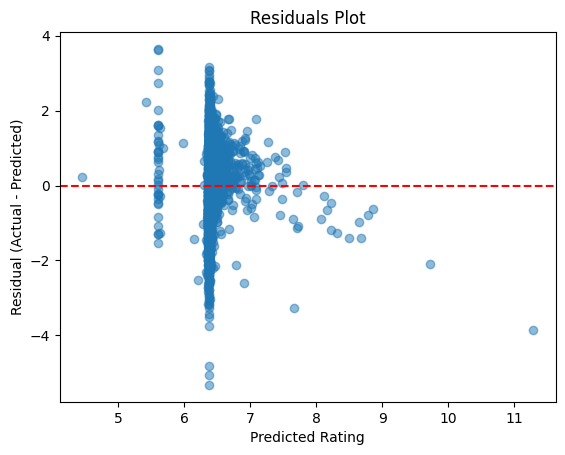

In [18]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Rating")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()

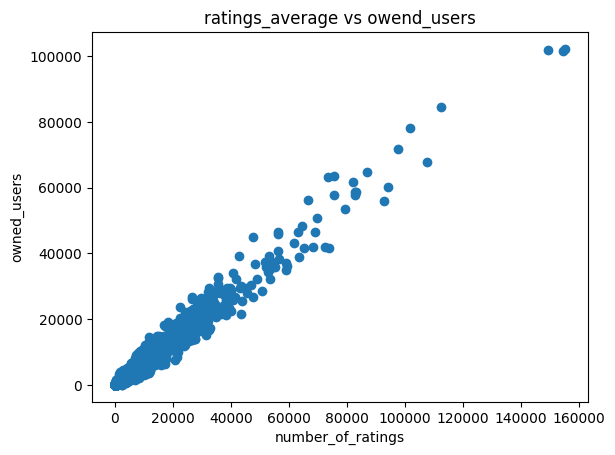

In [46]:
plt.scatter(silver_df['owned_users'], silver_df["users_rated"])
plt.xlabel("number_of_ratings")
plt.ylabel("owned_users")
plt.title("ratings_average vs owend_users")
plt.show()

In [53]:
# Now a model I think will work much better
x2 = silver_df[["owned_users"]]
y2 = silver_df["users_rated"]

x2_train, x2_test, y_train, y_test = train_test_split(x2, y2 , test_size = .2, random_state =2)
model2 = LinearRegression()
model2.fit(x2_train,y_train)


LinearRegression()

In [54]:
y_pred = model2.predict(x2_test)
residuals = y_test - y_pred

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error is {mse}")
print(f"R2 score is {r2}")

Mean Squared Error is 346381.062071949
R2 score is 0.9719708599034419


In [55]:
print(silver_df.columns)

Index(['Unnamed: 0', 'id', 'name', 'year_published', 'min_players',
       'max_players', 'play_time', 'min_age', 'users_rated', 'rating_average',
       'bgg_rank', 'complexity_average', 'owned_users', 'mechanics', 'domains',
       'mechanics_list', 'description'],
      dtype='object')


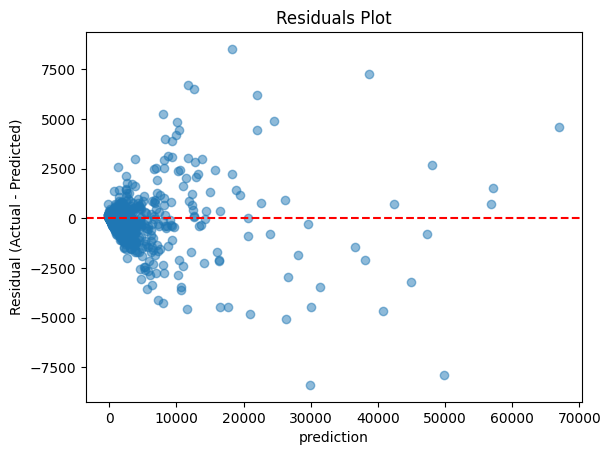

In [57]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("prediction")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()